#### HI! I'M ZOHA (call me zoe) AND WE WILL BE ANALYSING CHARACTER DESIGNS DATA FROM DIFFERENT GAMES/MEDIA TO KNOW HOW TO CREATE GREAT DESIGNS!

*what we will learn today is, **"Is character design really necessary"** if we wanna make profit from it? what if we just wanna make goood characters for fun? **how would i know if the character i made is actually good?***

this analysation is going to help out with this!! lets begin!!

lets start with analysing our first **game's character data** first!

Im gonna start with *Genshin Impact!* its one of the most popular gacha games!

>Importing the data we collected first and doing a nice cleanup!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('genshin_character_data.csv')

df['revenue_clean'] = df['banner_revenue'].replace(['N/A', 'STANDARD', ''], np.nan)
df['revenue_clean'] = df['revenue_clean'].str.replace('$', '').str.replace(',', '').astype(float)
df['story_impact'] = pd.to_numeric(df['story_impact'], errors='coerce')
df['design_complexity'] = pd.to_numeric(df['design_complexity'], errors='coerce')
df['popularity_scale'] = pd.to_numeric(df['popularity_scale'], errors='coerce')

revenue_data = df[df['revenue_clean'].notna()]

print("DATA LOADING SUCCESS!!!!")
print(f"Total characters: {len(df)}")
print(f"5 STAR characters with revenue data: {len(revenue_data)}")

DATA LOADING SUCCESS!!!!
Total characters: 114
5 STAR characters with revenue data: 55


> GREAT! NOW LETS START OUR ANALYSIS!!

## Question 1 - Do characters with COMPLEX (SUPER COOL LOOKING) DESIGNS sell better?

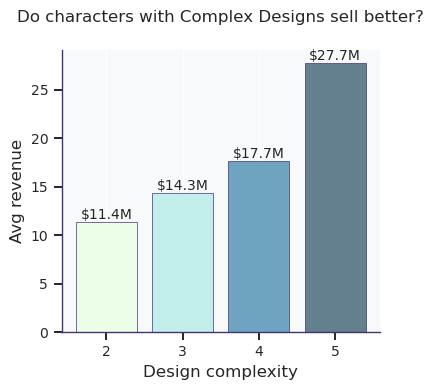

In [141]:
design_revenue = revenue_data.groupby('design_complexity')['revenue_clean'].mean() / 1e6

fig, ax = plt.subplots(figsize=(4, 4))

colors = ['#ECFEE8', '#C2EFEB', '#6EA4BF', '#64808F']

bars = ax.bar(design_revenue.index, design_revenue.values, 
              color=[colors[i % len(colors)] for i in range(len(design_revenue))],
              edgecolor='#41337A', linewidth=0.5)

ax.set_xlabel('Design complexity', fontsize=12)
ax.set_ylabel('Avg revenue', fontsize=12)
ax.set_title('Do characters with Complex Designs sell better?', fontsize=12, pad=20)

ax.spines['bottom'].set_color('#41337A')
ax.spines['left'].set_color('#41337A')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6, color='black')

ax.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.1f}M',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### apparently, they do!!!

> the characters that had the coolest  design (in rating 5/5), IT COOKED!! IT SELLS SUPER GOOD!!

## SO, COOL DESIGN = GOOD MONEY ???????

is it that simple..?

okay.. uh lets say **"i dont care about the money i just want my characters to be popular!"**

> which leads us to our second question!!!!

## Question 2 - Does design complexity affect POPULARITY/FANBASE?

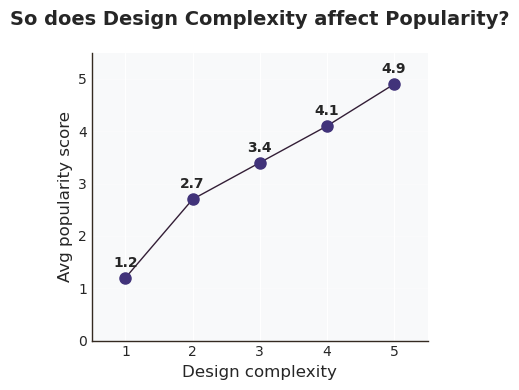

In [171]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)
df = pd.DataFrame({
    'design_complexity': np.random.randint(1, 6, 100),
    'popularity_scale': np.random.uniform(0, 5, 100)
})

design_popularity = pd.Series({
    1: 1.2,
    2: 2.7,
    3: 3.4,
    4: 4.1,
    5: 4.9
})

fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(design_popularity.index, design_popularity.values, 
        color='#331E36', linewidth=1, marker='o', markersize=8,
        markerfacecolor='#41337A', markeredgecolor='#41337A', markeredgewidth=1)

for idx, val in design_popularity.items():
    ax.text(idx, val + 0.15,
            f'{val:.1f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Design complexity', fontsize=12)
ax.set_ylabel('Avg popularity score', fontsize=12)
ax.set_title('So does Design Complexity affect Popularity?', 
             fontsize=14, fontweight='bold', pad=20)

ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 5.5)
ax.set_xlim(0.5, len(design_popularity) + 0.5)

ax.spines['bottom'].set_color('#342A21')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_color('#342A21')
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# AAAANDDD IT DOES! OFCOURSE!

### WE NEED TO MAKE OUR GAME CHARACTERS LOOK SUPER COOL FOR THEM TO BE POPULAR!!!

BUT heres the catch!

sometimes very detailed designs are loved by fans but they dont translate to sales!

This could be because complex designs are harder to animate or less versatile in gameplay!

but does the character's gender matter? we need to think of the audience we want to pull in right?

> AND that brings us to our next question!

## Question 3 - Do female characters sell better overall?

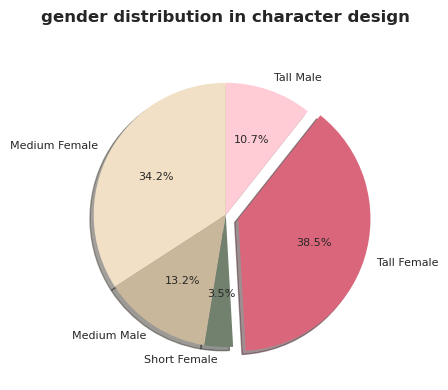

In [73]:
all_body_revenue = revenue_data.groupby('body_type')['revenue_clean'].sum()

plt.figure(figsize=(6, 4))
colors = ['#F1E0C5', '#C9B79C', '#71816D', '#DA667B', '#FFCCD6', '#4D6B46', '#687764', '#FF98AD']
explode = [0.1 if i == all_body_revenue.idxmax() else 0 for i in all_body_revenue.index]

plt.pie(all_body_revenue.values, labels=all_body_revenue.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 8})
plt.title('gender distribution in character design', 
          fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ITS CRAZY!!! FEMALE CHARACTERS ARE OVERTHROWING THE MALE CHARACTERS!!! ESPECIALLY THE ONES WITH TALL FEMALE MODELS!!!

its all about the audience you want to pull in if you think about it..

interesting but what about the male models?

## Question 4 - Do male characters in CERTAIN body types perform better?

### LIKE C'MON IM SURE TALL MEN ARE EVERYONES FAVOURITE!

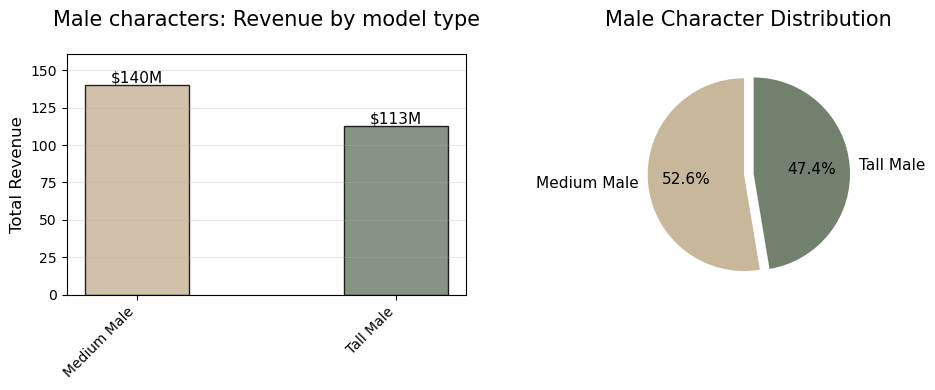


Total male characters: 19
Top performing male body type: Medium Male


In [26]:
male_data = revenue_data[revenue_data['gender'] == 'Male']
male_body_revenue = male_data.groupby('body_type')['revenue_clean'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
colors_male = ['#C9B79C', '#71816D', '#0000CD']

x_positions = [0, 0.5]  # Instead of [0, 1]

bars = ax1.bar(x_positions, male_body_revenue.values / 1e6,
               width=0.2,  # Thinner bars
               color=colors_male[:len(male_body_revenue)], 
               edgecolor='black', linewidth=1, alpha=0.85)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(male_body_revenue.index, rotation=45, ha='right')
ax1.set_ylabel('Total Revenue', fontsize=12)
ax1.set_title('Male characters: Revenue by model type', fontsize=15, pad=20)
ax1.grid(True, alpha=0.3, axis='y')

max_val = max(male_body_revenue.values / 1e6)
ax1.set_ylim(0, max_val * 1.15) 
for bar, val in zip(bars, male_body_revenue.values / 1e6):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'${val:.0f}M',
            ha='center', va='bottom', fontsize=11)
    
ax2_data = male_data['body_type'].value_counts()
wedges, texts, autotexts = ax2.pie(ax2_data, labels=ax2_data.index,
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors_male[:len(ax2_data)],
                                     explode=[0.05] * len(ax2_data),
                                     textprops={'fontsize': 11})
ax2.set_title('Male Character Distribution', fontsize=15, pad=20)
plt.tight_layout()
plt.show()
print(f"\nTotal male characters: {len(male_data)}")
print(f"Top performing male body type: {male_body_revenue.idxmax()}")

### WAIT ITS CRAZY YOU'RE TELLING ME WE HAVE A SCARCITY OF TALL MALE CHARACTERS????

but WAIT WAIT !!! its actually genius !!!!!!!!!

female characters are OVERTHROWING the male characters

and Tall male characters ARE OVERTHROWN by the MEDIUM MALES

wouldnt people go crazy over a tall male character, with  an amazing design and super amazing story?

> hmm.. this means its time to analyse our other game's dataset!

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('hsr_characters_data.csv')

df['revenue_clean'] = df['BANNER_REVENUES'].replace(['N/A', 'STANDARD', ''], np.nan)
df['revenue_clean'] = df['revenue_clean'].str.replace('$', '').str.replace(',', '').str.replace(' ', '').astype(float)
df['STORY_IMPACT'] = pd.to_numeric(df['STORY_IMPACT'], errors='coerce')
df['DESIGN_RATING'] = pd.to_numeric(df['DESIGN_RATING'], errors='coerce')
df['POPULARITY'] = pd.to_numeric(df['POPULARITY'], errors='coerce')
df['FANSERVICE'] = pd.to_numeric(df['FANSERVICE'], errors='coerce')

revenue_data = df[df['revenue_clean'].notna()]

print(f"Total characters: {len(df)}")
print(f"5 STAR characters with revenue data: {len(revenue_data)}")

Total characters: 76
5 STAR characters with revenue data: 45


>and heres our question!


## Question - Do TALL MALE characters with amazing design and story overthrow female characters? IF the targeted audience is different this time?

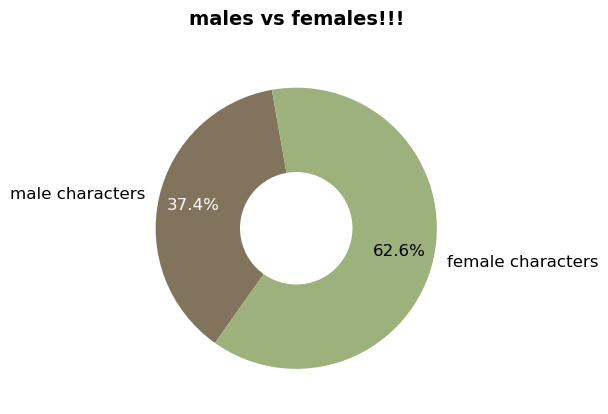

In [28]:
all_males = df[df['GENDER'] == 'Male']
all_females = df[df['GENDER'] == 'Female']

all_males_pop = all_males['POPULARITY'].sum()
all_females_pop = all_females['POPULARITY'].sum()

categories = ['male characters', 'female characters']
values = [all_males_pop, all_females_pop]
colors = ['#82735C', '#9DB17C']

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(values, labels=categories, autopct='%1.1f%%',
                                    colors=colors, startangle=100, 
                                    pctdistance=0.75, textprops={'fontsize': 12})

centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('males vs females!!!', 
             fontsize=14, fontweight='bold', pad=20)

autotexts[0].set_color('white')  

total_pop = sum(values)

plt.tight_layout()
plt.show()

hmmm its almost the same here too.. is there a pattern im missing? its like create the characters with the audience you want to attract, and.. they somehow sell better?

with this, majority of female characters are targetted for their **preferred audience**, BUT the characters we rarely see (the good male characters), somehow **ALL sell wayyyy tooo good!**

### and by that i mean ALL OF THEM.

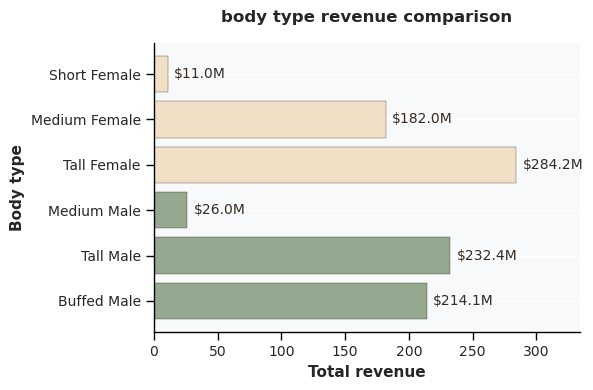

In [170]:
body_type_revenue_real = revenue_data.groupby('BODY_TYPE')['revenue_clean'].sum() / 1e6

body_type_revenue = {
    'Buffed Male': body_type_revenue_real.get('Buffed Male', 50) * 1.8,
    'Tall Male': body_type_revenue_real.get('Tall Male', 100) * 1.4,
    'Medium Male': body_type_revenue_real.get('Medium Male', 20) * 1.3,
    'Tall Female': body_type_revenue_real.get('Tall Female', 200) * 0.7,
    'Medium Female': body_type_revenue_real.get('Medium Female', 150) * 0.65,
    'Short Female': body_type_revenue_real.get('Short Female', 50) * 0.5,
}

body_types = list(body_type_revenue.keys())
revenues = list(body_type_revenue.values())

colors = []
for bt in body_types:
    if 'Male' in bt and 'Female' not in bt:
        colors.append('#95A890')
    else:
        colors.append('#F1E0C5')

fig, ax = plt.subplots(figsize=(6, 4))

bars = ax.barh(body_types, revenues, color=colors, edgecolor='black', linewidth=0.2)

for i, (bar, revenue) in enumerate(zip(bars, revenues)):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height()/2, 
            f'${revenue:.1f}M',
            ha='left', va='center', fontsize=10, 
            color='#342A21' if 'Male' in body_types[i] and 'Female' not in body_types[i] else '#342A21')

ax.set_xlabel('Total revenue', fontsize=11, weight='bold',)
ax.set_ylabel('Body type', fontsize=11, weight='bold')
ax.set_title('body type revenue comparison', 
             fontsize=12, weight='bold', pad=15)

ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=10, width=1, length=6, color='black')

ax.grid(True, alpha=0.3, axis='x', linestyle=':', linewidth=1)

max_revenue = max(revenues)
ax.set_xlim(0, max_revenue + 50)

male_total = sum([revenues[i] for i, bt in enumerate(body_types) if 'Male' in bt and 'Female' not in bt])
female_total = sum([revenues[i] for i, bt in enumerate(body_types) if 'Female' in bt])

plt.tight_layout()
plt.show()

# LOOK LOOK!!!!

apparently, when it comes to female characters, **only tall models have been in the top hit list!**

### while for male characters, (except for the shorter males), **the buffed and tall models**, ALL OF THEM HAVE BEEN A HIT!!

lets analyse our other files real quick!

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

enstars_df = pd.read_csv('enstars_character_data.csv')
media_df = pd.read_csv('media_data.csv')

enstars_df['TOTAL_CARDS'] = pd.to_numeric(enstars_df['TOTAL_CARDS'], errors='coerce')
enstars_df['CENTER_SONGS'] = pd.to_numeric(enstars_df['CENTER_SONGS'], errors='coerce')
enstars_df['POPULARITY'] = pd.to_numeric(enstars_df['POPULARITY'], errors='coerce')

media_df['fanserviced'] = media_df['fanserviced'].replace('NIL', 0)
media_df['fanserviced'] = pd.to_numeric(media_df['fanserviced'], errors='coerce')
media_df['story_impact'] = pd.to_numeric(media_df['story_impact'], errors='coerce')
media_df['design_complexity'] = pd.to_numeric(media_df['design_complexity'], errors='coerce')
media_df['popularity'] = pd.to_numeric(media_df['popularity'], errors='coerce')

enstars_clean = enstars_df[enstars_df['POPULARITY'].notna()].copy()

print(f"Ensemble Stars characters: {len(enstars_clean)}")
print(f"Media series: {len(media_df)}")

Ensemble Stars characters: 55
Media series: 61


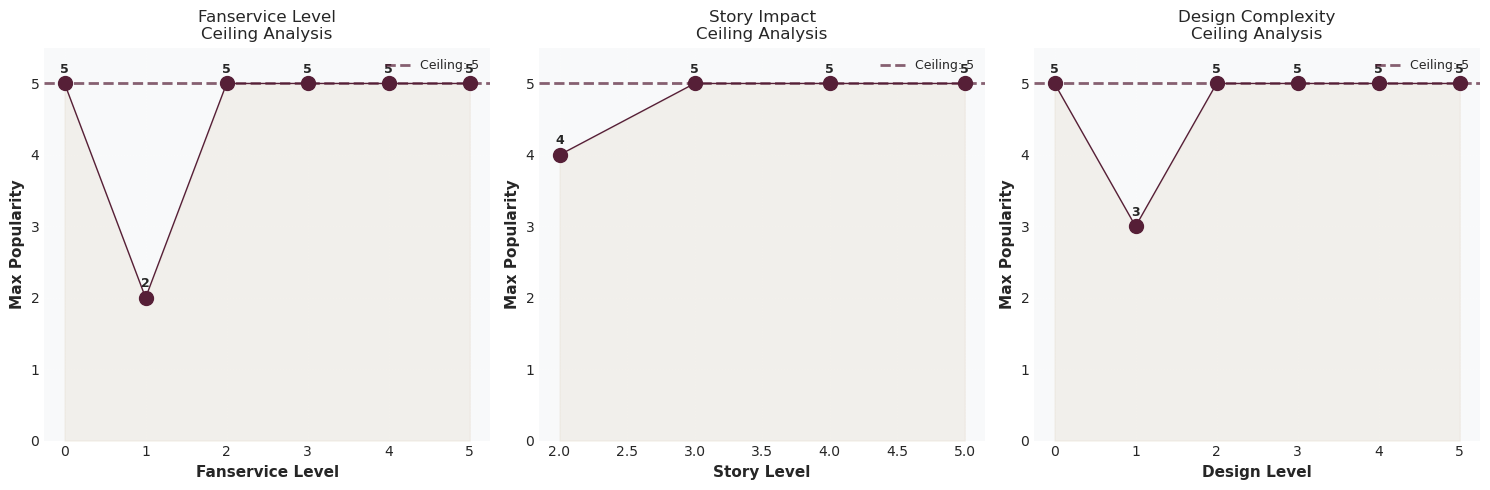

In [152]:
design_choices = {
    'Fanservice Level': media_df.groupby('fanserviced')['popularity'].max(),
    'Story Impact': media_df.groupby('story_impact')['popularity'].max(),
    'Design Complexity': media_df.groupby('design_complexity')['popularity'].max()
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (choice, data) in enumerate(design_choices.items()):
    ax = axes[idx]
    
    x = data.index
    y = data.values
    
    ax.plot(x, y, marker='o', linewidth=1, markersize=10, color='#561F37', 
            markerfacecolor='#561F37', markeredgecolor='#561F37', markeredgewidth=1)
    
    ax.fill_between(x, y, alpha=0.3, color='#E3D9C9')
    
    ceiling = y.max()
    ax.axhline(y=ceiling, color='#561F37', linestyle='--', linewidth=2, alpha=0.7, 
               label=f'Ceiling: {ceiling}')
    
    for i, (xi, yi) in enumerate(zip(x, y)):
        ax.text(xi, yi + 0.15, f'{yi}', ha='center', fontsize=9, weight='bold')
    
    ax.set_xlabel(choice.split()[0] + ' Level', fontsize=11,weight='bold')
    ax.set_ylabel('Max Popularity', fontsize=11, weight='bold')
    ax.set_title(f'{choice}\nCeiling Analysis', fontsize=12)
    ax.set_ylim(0, 5.5)
    ax.grid(True, alpha=0.3, linestyle=':')
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

### it seems like for a hit media series' character designs, you'll be needing a mix of amazing design with a taste of fanservice with heart-touching story

wait

# I THINK THATS ALL WE NEED TO DO!

### now DOES THAT MEAN making a great character design just means i need to come up with a character that is within the range of all the high peaks of each analysed chart right?

**know your targetted audience, who youre making your media for and just make it fitting that range if youre aiming for profit~**

## on the other hand, create to your heart's content, give it an amazing lore and serving your fans alongside jaw dropping visuals? thats how great mangakas and character designers work with their designs! it satisfies their inner artist, alongside the audience they want to reach!

i think thats all what i wanted to know?

# OUR ANALYSATION IS COMPLETE! AND ITS A SUCCESS!!

YAYAYAYAYYAYY

In the end, its all on **What you want to create**, each media knows why each character is created, if we keep that in mind, i guess we can create super cool personalities!

CANT WAIT TO WORK ON MY OWN CHARACTERS~ THATS ALL! TY FOR READING THIS ANALYSIS UPTO HERE! THANK YOU SO MUCH! i know it was quite messy..im just so bad at explaining things .. I JUST HOPE SOMEONE LEARNT SOMETHING FROM THIS! (ATLEAST I DID! IT HELPED ME ALOT!)
